In [1]:
%run import_util.py
import scan_api
import util

START loading util functions
DONE loading util functions


In [2]:
# set the data folder to work on
util.data_directory="./data/"
print(util.data_directory)
n=2
n1=10
# date='3/30/20'

./data/


# read covid_data

In [3]:
df0=util.read_file("generated_data/covid_timeseries_deaths.csv")
df1=util.read_file("generated_data/covid_timeseries_cases.csv")
df2=util.read_file("generated_data/covid_timeseries_recovered.csv")
dfList=[df0,df1,df2]
# df0[df0['country']=='India']

,country,lat,long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
77,India,21.0,78.0,0,0,0,0,0,0,0,...,4,7,10,10,12,20,20,24,27,32


# EDA Start - plot day0 data

In [11]:
dfList_Countries=[]
# tier1_countryList=['Italy','US','Spain','Turkey']
countryList=['Germany','India','S. Korea','UK', 'Brazil','Indonesia','Canada','France',]
# countryList=util.countryList
for i, df in enumerate(dfList):
    df1=df[df['country'].isin(countryList)]
    df1.drop({'lat','long'},axis=1,inplace=True)
    df1.sort_values('country')
    df1=df1.rename(util.new_countries)
    dfList_Countries.append(df1)
    
for i, df in enumerate(dfList_Countries):
    df2=df.rename(columns={"country":"day"})
    df2=df2.set_index('day').transpose()
    df2=df2.reset_index().rename(columns={"index":"date"})
    df2['date']= pd.to_datetime(df2['date'])
    df2[countryList] = df2[countryList].apply(pd.to_numeric)
    dfList_Countries[i]=df2

for df in dfList_Countries:
    display(df.head(n))

day,date,Brazil,Canada,France,Germany,India,Indonesia,S. Korea,UK
0,2020-01-22,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0


day,date,Brazil,Canada,France,Germany,India,Indonesia,S. Korea,UK
0,2020-01-22,0,0,0,0,0,0,1,0
1,2020-01-23,0,0,0,0,0,0,1,0


day,date,Brazil,Canada,France,Germany,India,Indonesia,S. Korea,UK
0,2020-01-22,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0


{'Germany': 0   2020-03-09
 Name: date, dtype: datetime64[ns], 'India': 0   2020-03-13
 Name: date, dtype: datetime64[ns], 'S. Korea': 0   2020-02-21
 Name: date, dtype: datetime64[ns], 'UK': 0   2020-03-06
 Name: date, dtype: datetime64[ns], 'Brazil': 0   2020-03-18
 Name: date, dtype: datetime64[ns], 'Indonesia': 0   2020-03-13
 Name: date, dtype: datetime64[ns], 'Canada': 0   2020-03-16
 Name: date, dtype: datetime64[ns], 'France': 0   2020-02-26
 Name: date, dtype: datetime64[ns]}

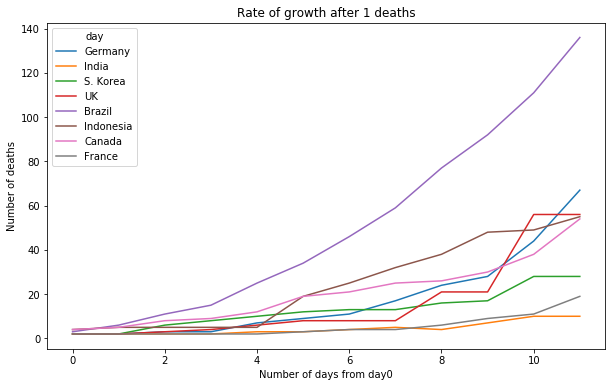

{'Germany': 0   2020-03-01
 Name: date, dtype: datetime64[ns], 'India': 0   2020-03-15
 Name: date, dtype: datetime64[ns], 'S. Korea': 0   2020-02-21
 Name: date, dtype: datetime64[ns], 'UK': 0   2020-03-05
 Name: date, dtype: datetime64[ns], 'Brazil': 0   2020-03-13
 Name: date, dtype: datetime64[ns], 'Indonesia': 0   2020-03-15
 Name: date, dtype: datetime64[ns], 'Canada': 0   2020-03-12
 Name: date, dtype: datetime64[ns], 'France': 0   2020-03-01
 Name: date, dtype: datetime64[ns]}

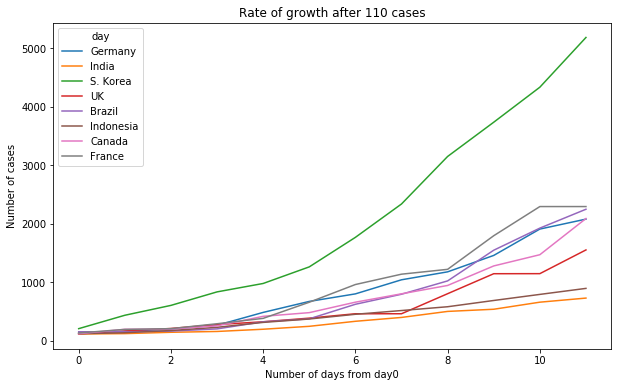

{'Germany': 0   2020-02-18
 Name: date, dtype: datetime64[ns], 'India': 0   2020-02-16
 Name: date, dtype: datetime64[ns], 'S. Korea': 0   2020-02-09
 Name: date, dtype: datetime64[ns], 'UK': 0   2020-02-16
 Name: date, dtype: datetime64[ns], 'Brazil': 0   2020-03-17
 Name: date, dtype: datetime64[ns], 'Indonesia': 0   2020-03-10
 Name: date, dtype: datetime64[ns], 'Canada': 0   2020-02-21
 Name: date, dtype: datetime64[ns], 'France': 0   2020-02-12
 Name: date, dtype: datetime64[ns]}

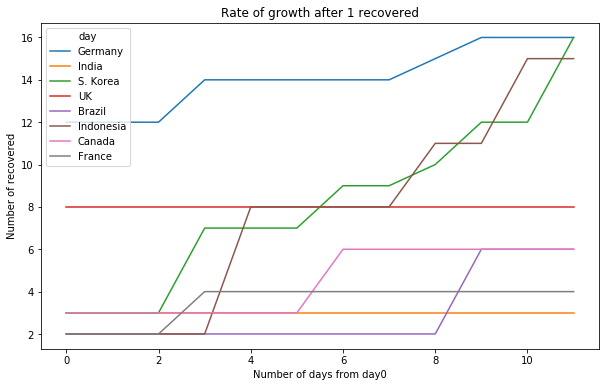

In [12]:
def dayZeroData(df,country,mydict,dayzero,dayX):
    df4 = df[['date',country]]
    df4 = df4.set_index('date')
    df4=df4[df4[country]>dayzero].head(dayX)
    df4.reset_index(inplace=True)
    mydict.update( {country : df4.head(1).date} )
    df4.drop({'date'},axis=1,inplace=True)
    return df4


def pltDataDay0(df, dayzero=1,dayX=12,
                graphTitle="cases",
                xlabel="Number of days from day0",
                ylabel="cases"):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title("Rate of growth after " + str(dayzero) + " "+ graphTitle) 
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Number of " + ylabel)
    mydict = {}
    
    for cols in countryList :
        x=dayZeroData(df,cols,mydict,dayzero,dayX)
        x.plot(ax=ax)

    display(mydict)
    plt.show()


pltDataDay0(dfList_Countries[0],dayzero=1,graphTitle="deaths",ylabel="deaths")
pltDataDay0(dfList_Countries[1],dayzero=110)
pltDataDay0(dfList_Countries[2],graphTitle="recovered",ylabel="recovered")
